<a href="https://colab.research.google.com/github/marcgym2/MachineLearning/blob/main/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
# Permite mostrar markdown como saliuda en Jupyter
from IPython.display import Markdown
  

In [4]:
df_measures = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/measures_v2.csv")

In [10]:
df_measures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [9]:
df_measures

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


In [13]:
df_measures.describe().T

,count,mean,std,min,25%,50%,75%,max
u_q,1330816.0,54.279005,44.173234,-25.290930,12.069925,48.938181,90.034393,133.036994
coolant,1330816.0,36.229995,21.786149,10.623751,18.698135,26.900141,49.857487,101.598512
stator_winding,1330816.0,66.342745,28.672061,18.585815,42.787957,65.110129,88.141137,141.362885
u_d,1330816.0,-25.133809,63.091972,-131.530411,-78.690904,-7.429755,1.470271,131.469788
stator_tooth,1330816.0,56.878582,22.952233,18.133976,38.416012,56.036345,75.586682,111.946423
motor_speed,1330816.0,2202.080728,1859.663350,-275.549144,317.110665,1999.976685,3760.639058,6000.015137
i_d,1330816.0,-68.716810,64.933233,-278.003632,-115.406060,-51.093763,-2.979688,0.051897
i_q,1330816.0,37.412782,92.181880,-293.426793,1.095863,15.774007,100.612150,301.707855
pm,1330816.0,58.506776,19.001498,20.856956,43.151582,60.266287,72.008371,113.606628
stator_yoke,1330816.0,48.187965,19.991004,18.076689,31.990333,45.625509,61.460828,101.147964


In [14]:
# Comprobando si algún valor es NaN en un dataframe
df_measures.isnull().values.any()

False

In [15]:
df_measures.corr()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
u_q,1.000000,0.051721,0.050610,0.004702,0.104373,0.683556,-0.100357,-0.124589,0.122365,0.090992,0.150264,-0.136215,-0.030499
coolant,0.051721,1.000000,0.504835,0.195517,0.674974,0.011872,0.074865,-0.256389,0.467117,0.860750,0.525963,-0.257982,0.635797
stator_winding,0.050610,0.504835,1.000000,-0.234950,0.970135,0.432034,-0.624370,0.065617,0.795893,0.860268,0.333208,0.095510,0.340580
u_d,0.004702,0.195517,-0.234950,1.000000,-0.142749,-0.288472,0.448331,-0.723069,-0.172031,-0.008098,0.203647,-0.753779,0.263264
stator_tooth,0.104373,0.674974,0.970135,-0.142749,1.000000,0.398431,-0.487062,-0.042294,0.832084,0.953115,0.443470,-0.018413,0.450821
motor_speed,0.683556,0.011872,0.432034,-0.288472,0.398431,1.000000,-0.700609,-0.068881,0.458947,0.255790,0.118232,-0.043903,-0.028585
i_d,-0.100357,0.074865,-0.624370,0.448331,-0.487062,-0.700609,1.000000,-0.231344,-0.427736,-0.278005,0.016397,-0.274097,0.053524
i_q,-0.124589,-0.256389,0.065617,-0.723069,-0.042294,-0.068881,-0.231344,1.000000,-0.142416,-0.131466,-0.314044,0.996457,-0.324654
pm,0.122365,0.467117,0.795893,-0.172031,0.832084,0.458947,-0.427736,-0.142416,1.000000,0.756684,0.513728,-0.117138,0.386241
stator_yoke,0.090992,0.860750,0.860268,-0.008098,0.953115,0.255790,-0.278005,-0.131466,0.756684,1.000000,0.520382,-0.117118,0.563437


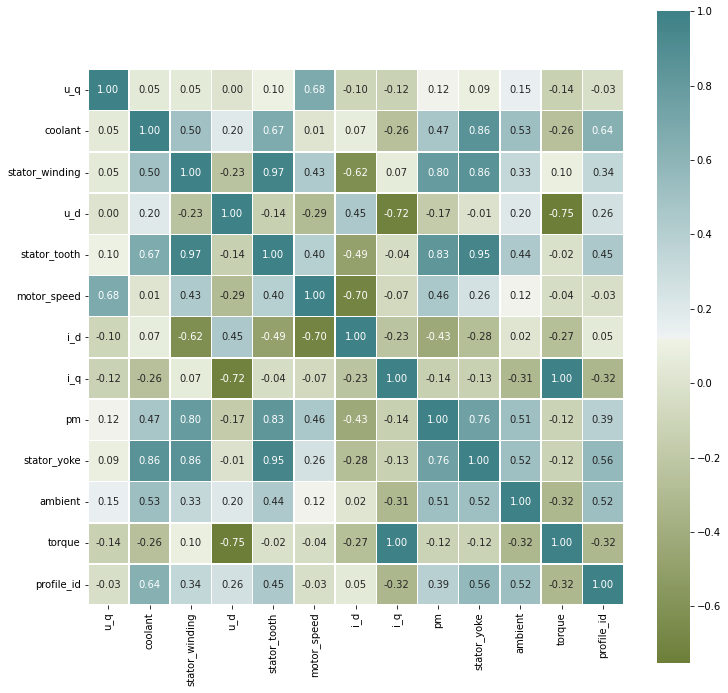

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#correlation map
f,ax=plt.subplots(figsize=(12,12))
corr=df_measures.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', 
            mask= np.zeros_like(corr,dtype=bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), 
            square=True, ax=ax)

plt.show()

In [11]:
# Crear copia dataframe
df_measures_mod = df_measures.copy()

In [22]:
# Crear, modificar o eliminar columnas
df_measures_mod = df_measures_mod.drop(['coolant'], axis=1)

In [28]:
# Filtrar registros, filtrando con base en profile_id
in_2 = df_measures_mod['profile_id'] == 2
df_measures_mod_2 = df_measures[in_2]
df_measures_mod_2

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
90975,4.921712,15.717488,19.729197,0.051183,18.889385,99.964539,-0.000385,0.000221,23.153740,18.395088,19.995035,-0.605463,2
90976,4.948537,15.890841,19.737572,0.074807,18.895809,100.017822,-0.002003,0.000886,23.153469,18.376493,19.954098,-0.613076,2
90977,4.941477,15.992567,19.740677,0.063648,18.902767,99.999977,0.000156,-0.000046,23.147993,18.371748,19.924765,-0.615070,2
90978,4.921178,16.135164,19.727468,0.076738,18.908100,99.980309,0.001466,-0.001133,23.135658,18.375002,19.903748,-0.617488,2
90979,4.924347,16.165384,19.730543,0.084553,18.876144,100.023392,0.000682,0.003452,23.137959,18.378679,19.888687,-0.606528,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110327,4.177660,19.021313,19.525965,1.486662,18.808996,100.002220,-2.001316,1.096361,23.025192,18.961349,20.499807,0.220731,2
110328,4.147643,19.032621,19.533833,1.500651,18.823442,99.960945,-2.000534,1.097130,23.017328,18.967283,20.474960,0.225449,2
110329,4.145742,19.039347,19.533348,1.480287,18.824469,99.993347,-2.001008,1.099562,23.013062,18.974239,20.441975,0.215051,2
110330,4.144702,19.034458,19.525932,1.481278,18.807085,100.001083,-2.001559,1.096170,23.013445,18.977720,20.318863,0.227338,2


In [33]:
# Crear subconjutos de datos
df_measures.sample(5, replace = False)


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
185601,4.183011,18.333292,19.362911,1.456831,18.624149,100.006859,-2.000903,1.098132,23.451811,18.696630,22.337816,1.768947e-01,3
1012234,-1.768751,90.475550,117.007774,-0.253455,104.791891,-0.001665,-2.001445,1.097683,85.489406,98.252040,25.150731,8.724993e-12,73
1176461,130.263969,49.819624,70.994429,18.718378,67.230469,3159.816749,-24.753910,-17.510813,75.314482,59.999615,25.755222,-1.405788e+01,48
1285405,15.100760,27.477850,104.791173,-129.895564,78.706623,2748.986002,-213.720108,152.180922,70.087226,56.158697,26.384509,1.452152e+02,58
1087298,105.382905,43.736654,71.687465,48.393338,64.758893,3879.213391,-87.687929,-33.981392,64.875815,56.513476,25.136591,-3.140081e+01,63


In [31]:
# Crear grupos de datos -> coordenadas 
df_measures_dq = df_measures_mod.drop([ 'stator_winding', 'stator_tooth', 'pm', 'stator_yoke', 'ambient', 'torque'], axis=1)

In [32]:
df_measures_dq

,u_q,u_d,motor_speed,i_d,i_q,profile_id
0,-0.450682,-0.350055,0.002866,0.004419,0.000328,17
1,-0.325737,-0.305803,0.000257,0.000606,-0.000785,17
2,-0.440864,-0.372503,0.002355,0.001290,0.000386,17
3,-0.327026,-0.316199,0.006105,0.000026,0.002046,17
4,-0.471150,-0.332272,0.003133,-0.064317,0.037184,17
...,...,...,...,...,...,...
1330811,-2.152128,0.791801,0.000380,-2.000169,1.097528,71
1330812,-2.258684,0.778900,0.002985,-2.000499,1.097569,71
1330813,-2.130312,0.804914,0.002301,-1.999268,1.098765,71
1330814,-2.268498,0.763091,0.005662,-2.000999,1.095696,71
